# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [1]:
import time
import math
import multiprocessing
from multiprocessing import Pool
import matplotlib.pyplot as plt

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    # print("Results", result)
    # print("Overall Time:", int(time.time()-tp1))
    return float(time.time()-tp1)
 

## Load Target function separately 
The target function needs to be loaded in from a separate python file.
So save this function declaration in a file miscFunc.py

    import math

    def my_func(x):  
        s = math.sqrt(x)  
        return s
    

In [2]:
import miscFunc as miscFunc # if miscFunc.py is changed the kernel needs to be restarted. 

This verbose version shows which process in the pool is running each task.   
Put this definition in miscFunc.py as well.  

    def my_func_verbose(x):
        s = math.sqrt(x)
        print("Task", multiprocessing.current_process(), x, s)
        return s

In [3]:
dataRange = range(20)

Use the pool_process function to apply my_func to the data in dataRange.  
This task is so light it requires very little processing time. 

In [4]:
dataRange = range(10)
pool_process(miscFunc.my_func, dataRange, 1)

3.9317667484283447

## A naive function for checking primes 

In [5]:
miscFunc.check_prime(15488801)

15488801 is a prime number
Time: 2.474536418914795
Task <_MainProcess name='MainProcess' parent=None started> 15488801 True


True

In [6]:
miscFunc.check_prime(15488803)

15488803 is not a prime number
11 times 1408073 is 15488803
Time: 0
Task <_MainProcess name='MainProcess' parent=None started> 15488803 False


False

In [7]:
check_work = [45,13,4]

In [8]:
pool_process(miscFunc.my_func_verbose, check_work, 1)

3.8262665271759033

# Task 1 - Multiprocessing comparison for prime number checking function - Using multicores on slow process

Note that, due to the nature of the check prime function, some results will be very quick (eg: for even numbers, only one check is required, because the check primes function will test if it is divisible by 2, and since it is, it is not a prime number). For some numbers, like a very large prime number, the function will take a long time to verify that the number is prime, because it needs to iterate through each number between 2 and the number - 1. Since we are only interested in the increase in total runtime due to the increase in the size of the input list, we will set each number to be a large prime number (15488801). This implies that the function should take the same amount of time for a given input. This will allow us to see how multicores increase performance, as we are splitting the same task over multiple cores so that the total task completion time is lower.

In the next section, we will examine a non-prime number, which should take a shorter amount of time to execute. This will enable us to determine how the efficiency of multiprocessing changes depending on the task being done. We would expect that, due to the increased overhead involved with multiprocessing, its use would be less efficient when the time taken to complete our processing task is low

## Set up input array

In [9]:
one_core_runtime = []
limit = 20

for i in range(1, limit+1):
    number_array = [15488801 for x in range(1, i+1)]
    one_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 1))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [10]:
two_core_runtime = []

for i in range(1, limit+1):
    number_array = [15488801 for x in range(1, i+1)]
    two_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 2))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [11]:
three_core_runtime = []

for i in range(1, limit+1):
    number_array = [15488801 for x in range(1, i+1)]
    three_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 3))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [12]:
four_core_runtime = []

for i in range(1, limit+1):
    number_array = [15488801 for x in range(1, i+1)]
    four_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 4))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0.5, 1.0, 'Multiprocessing runtime analysis')

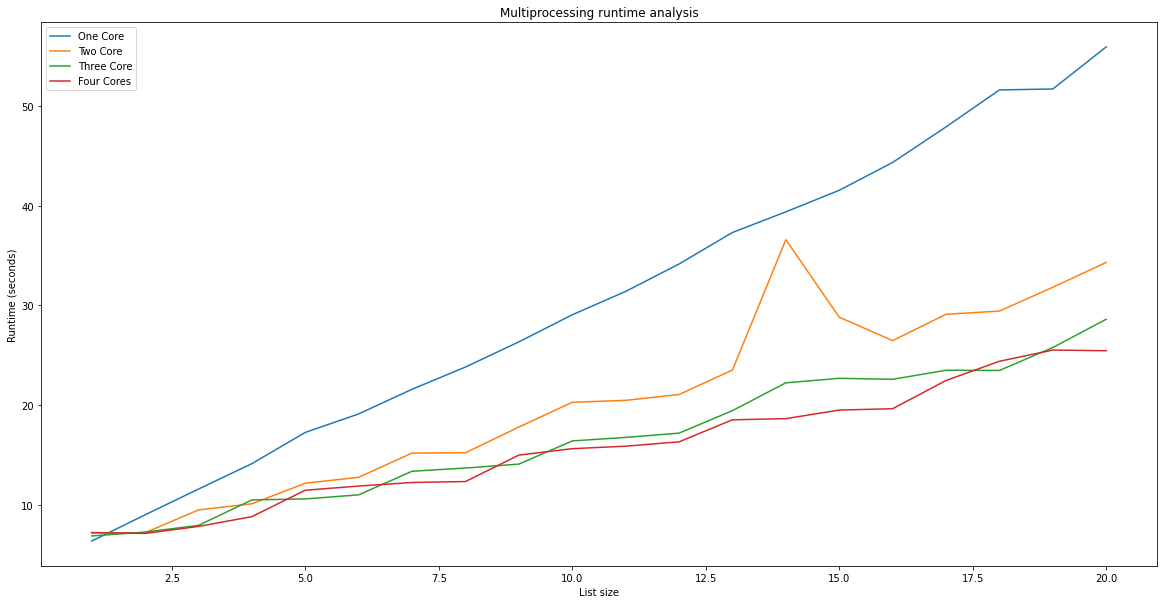

In [13]:
size_of_lists = range(1, limit+1)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(size_of_lists, one_core_runtime, label="One Core")
ax.plot(size_of_lists, two_core_runtime, label="Two Core")
ax.plot(size_of_lists, three_core_runtime, label="Three Core")
ax.plot(size_of_lists, four_core_runtime, label="Four Cores")

plt.legend()
plt.xlabel("List size")
plt.ylabel("Runtime (seconds)")
plt.title("Multiprocessing runtime analysis")

# Task 2 - Multiprocessing comparison for prime number checking function - Using multicores on quick processes

## Set up input array

In [15]:
one_core_runtime = []
limit = 20

for i in range(1, limit+1):
    number_array = [15488803 for x in range(1, i+1)]
    one_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 1))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [16]:
two_core_runtime = []

for i in range(1, limit+1):
    number_array = [15488803 for x in range(1, i+1)]
    two_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 2))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [17]:
three_core_runtime = []

for i in range(1, limit+1):
    number_array = [15488803 for x in range(1, i+1)]
    three_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 3))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [18]:
four_core_runtime = []

for i in range(1, limit+1):
    number_array = [15488803 for x in range(1, i+1)]
    four_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 4))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0.5, 1.0, 'Multiprocessing runtime analysis')

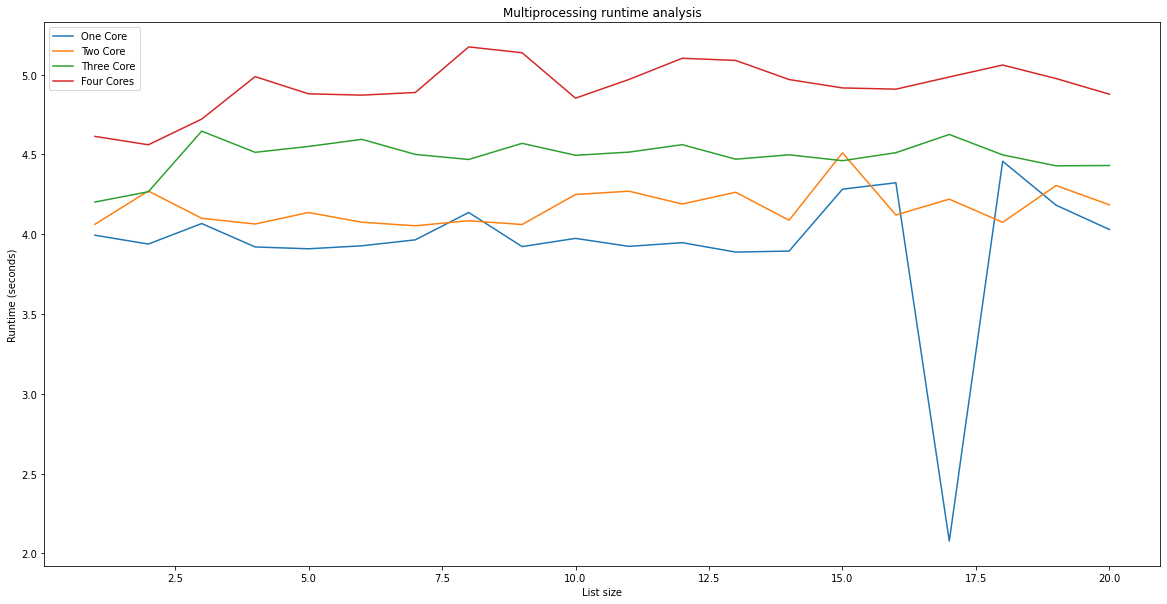

In [19]:
size_of_lists = range(1, limit+1)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(size_of_lists, one_core_runtime, label="One Core")
ax.plot(size_of_lists, two_core_runtime, label="Two Core")
ax.plot(size_of_lists, three_core_runtime, label="Three Core")
ax.plot(size_of_lists, four_core_runtime, label="Four Cores")

plt.legend()
plt.xlabel("List size")
plt.ylabel("Runtime (seconds)")
plt.title("Multiprocessing runtime analysis")